# MegEngine 基础概念

| ![](../../_static/logo/megvii-32.svg) [在 MegStudio 运行](https://studio.brainpp.com/project/2) | ![](../../_static/logo/github-32.svg) [查看源文件](https://github.com/MegEngine/Documentation/blob/main/source/getting-started/beginner/megengine-basic-concepts.ipynb) |
| --- | --- |

我们为第一次接触 MegEngine 框架的用户提供了此系列教程，通过本部分的学习，你将会：

- 对 MegEngine 框架中的 `Tensor`, `Operator`, `GradManager`, `Optimizer` 等基本概念有一定的了解；
- 对深度学习中的前向传播、反向传播和参数更新的具体过程有更加清晰的认识；
- 通过写代码训练一个线性回归模型，对上面提到的这些概念进行具体的实践，加深理解。

请先运行下面的代码，检验你的环境中是否已经安装好 MegEngine（[安装教程](https://megengine.org.cn/doc/stable/zh/user-guide/install/)）：

In [1]:
import megengine

print(megengine.__version__)

1.5.0


接下来，我们将首先学习 MegEngine 框架中最基础的数据结构——张量（Tensor）。

## 张量（Tensor）

真实世界中的很多非结构化的数据，如文字、图片、音频、视频等，都可以表达成更容易被计算机理解的形式。

MegEngine 使用 [张量（Tensor）](https://megengine.org.cn/doc/stable/zh/reference/megengine.html#tensor)来表示数据。类似于 [NumPy](https://numpy.org/) 中的多维数组（[ndarray](https://numpy.org/doc/stable/reference/arrays.ndarray.html)），张量可以是标量、向量、矩阵或者多维数组（取决于有几个维度）。

- 0 维 Tensor 代表着标量，即一个最朴素的表示数值的元素，没有形状，我们可以用来抽象表示物体的类别，比如 1 表示狗，2 表示猫，也可以表示分数、概率等概念；
- 1 维 Tensor 代表着向量，如 $[1 \ 2 \ 3 \ \ldots n]$ 就是一个含有 n 个元素的向量，形状表示为 $(n,)$, 注意此处的向量没有行、列等方向的概念；
- 2 维 Tensor 代表着矩阵，比如我们经常看到的表格中会分为行（row）和列（column）两个维度，对应地其形状为 $(R, C)$;
- 3 维 Tensor 可以表示的常见数据有 RGB 图片，每张图片是由红、绿、蓝三个颜色通道组成的，每个颜色通道的高度（Height）和宽度（Weight）是一致的，即 $(H, W, C), C=3$;

如果你对这些抽象表示现实数据的方法感到陌生，不用担心，随着我们教程内容的深入，你会接触到实际的例子来帮助自己更好地理解它们。

在 MegEngine 的 Python 接口中，实现了 [Tensor 类](https://megengine.org.cn/doc/stable/zh/reference/api/megengine.Tensor.html) 作为最基础的数据结构。

- 我们可以通过将 Python `List` 或者 NumPy `ndarray` 作为 `Tensor` 类初始化时的 `data` 参数传入，来创建一个 Tensor 对象；
- 也可以通过 `megengine.functional` 中提供的 `arange()`, `ones()` 等方法来生成 Tensor，`functional` 子包我们会在后面介绍；

In [2]:
import numpy as np
import megengine as mge # 我们习惯将 MegEngine 缩写为 mge
import megengine.functional as F # 我们习惯将 functional 缩写为 F

# 1. 生成 Python List，然后转化为 MegEngine Tensor
py_list = list(range(5))
print(mge.tensor(py_list))

# 2. 生成 Numpy ndarray，然后转化为 MegEngine Tensor
np_ndarray = np.arange(5).astype("float32")
print(mge.tensor(np_ndarray))

# 3. 使用 functional 子包中的 arange 函数直接生成 MegEngine Tensor
mge_tensor = F.arange(5)
print(mge_tensor)

Tensor([0 1 2 3 4], dtype=int32, device=xpux:0)
Tensor([0. 1. 2. 3. 4.], device=xpux:0)
Tensor([0. 1. 2. 3. 4.], device=xpux:0)


在上面的例子中，我们采用 3 种不同的方法创建了一个形状为 $(5, )$ 的 1 维 Tensor 向量，它们并不完全一样。

注意：`tensor` 是 `Tensor` 的一个别名（Alias），也可以尝试直接这样导入：

In [3]:
from megengine import tensor
from megengine import Tensor

print(tensor([1, 2, 3]))      # 实际上我们更希望使用 float32 类型的 Tensor
print(Tensor([1., 2., 3.]))   # 因此我们会习惯性地加上一个点表示这是浮点数

Tensor([1 2 3], dtype=int32, device=xpux:0)
Tensor([1. 2. 3.], device=xpux:0)


### Tensor 属性

一个 Tensor 最基础的属性应该是维数 `ndim` 和形状 `shape`, 以前面创建的 `mge_tensor` 为例：

- 维数表示维度的个数，它是一个标量，用 Python 内置数据结构中的 `int` 类型表示；
- 而形状表示每个维度分别有多少个元素，它是一个向量，用 Python 内置数据结构中的 `tuple` 类型表示。

In [4]:
print(mge_tensor)
print(mge_tensor.ndim, type(mge_tensor.ndim))
print(mge_tensor.shape, type(mge_tensor.shape))

Tensor([0. 1. 2. 3. 4.], device=xpux:0)
1 <class 'int'>
(5,) <class 'tuple'>


我们可以发现，在打印一个 Tensor 时，除了输出元素的数值以外，会看到其它的 Tensor 属性信息。

通过 `device` 属性，我们可以获取 Tensor 当前所在的 [设备](https://megengine.org.cn/doc/stable/zh/reference/megengine.html#device)：

- 一般地，如果在创建 Tensor 时不指定 `device`，其 `device` 属性默认为 `xpux`，表示当前任意一个可用设备；
- 如果需要查询 Tensor 所在设备，可以使用 [Tensor.device](https://megengine.org.cn/doc/stable/zh/reference/api/megengine.Tensor.device.html) ; 
- 如果需要改变 Tensor 所在设备，可以使用 [Tensor.to](https://megengine.org.cn/doc/stable/zh/reference/api/megengine.Tensor.to.html) 或 [functional.copy](https://megengine.org.cn/doc/stable/zh/reference/api/megengine.functional.copy.html) .

注意：在 GPU 和 CPU 同时存在时，**MegEngine 将自动使用 GPU 作为默认的计算设备** 。

通过 `dtype` 属性我们可以获取 Tensor 的 [数据类型](https://megengine.org.cn/doc/stable/zh/reference/megengine.html#tensor-dtype)，默认使用 `float32` 类型：

- 为了方便理解，MegEngine 使用 NumPy 的 `dtype` 表示基础的数据类型；
- 使用 `type()` 可以获取实际的类型，用来区分 ndarray 和 Tensor;
- 在初始化 Tensor 对象时，还可以通过传入 `dtype` 参数来对数据类型直接进行转化。

In [5]:
print(mge_tensor.dtype)
print(type(mge_tensor))

print(Tensor([0., 1., 2., 3., 4.], dtype='float16'))

<class 'numpy.float32'>
<class 'megengine.tensor.Tensor'>
Tensor([0. 1. 2. 3. 4.], dtype=float16, device=xpux:0)


通过 `shape` 属性，我们可以获取 Tensor 的形状，这次我们以一个 2 行 3 列的矩阵 Tensor 为例：

In [6]:
matrix_tensor = Tensor([[1., 2., 3.], 
                        [4., 5., 6.]])
print(matrix_tensor.shape)

(2, 3)


通过 `size` 属性，我们可以获取 Tensor 中元素的个数：

In [7]:
print(matrix_tensor.size)   # 2 * 3 = 6

6


更多的对 Tensor 属性的介绍会随着我们对 MegEngine 的使用程度加深渐渐地浮出水面，你也可以通过 [Tensor API](https://megengine.org.cn/doc/stable/zh/reference/api/megengine.Tensor.html) 进行完整的查询。

### Tensor 方法

通过 `astype()` 方法我们将以拷贝的形式，创建一个指定数据类型的新 Tensor ，原 Tensor 不变：

In [8]:
mge_tensor = Tensor([0., 1., 2., 3., 4.])
print(mge_tensor.astype("float16"))

Tensor([0. 1. 2. 3. 4.], dtype=float16, device=xpux:0)


使用 `reshape()` 方法，可以得到修改形状后的 Tensor，原 Tensor 元素的值和总个数不变：

In [9]:
A = Tensor([[1., 2., 3.], 
            [4., 5., 6.]])

B = A.reshape(3, 2)
print(A.shape, B.shape)
print(B.numpy())

(2, 3) (3, 2)
[[1. 2.]
 [3. 4.]
 [5. 6.]]


另外， `reshape()` 方法的参数允许存在单个维度的缺省值，用 `-1` 表示，此时会自动推理该维度的值：

In [10]:
A = Tensor(np.random.random((2, 3, 4, 5)))  # 这里使用 NumPy 随机生成了形状为 (2, 3, 4, 5) 的多维数组
B = A.reshape(2, -1, 5)
print(A.shape, B.shape)

(2, 3, 4, 5) (2, 12, 5)


需要注意的是，这些操作都不是原地（In-place）执行的，即 `A` 本身没有改变，而是创建了新的 Tensor 返回给 `B`.

Tensor 也支持与其它的数据结构进行相互转化——

通过 Tensor 自带的 `numpy()` 方法，可以拷贝 Tensor 并转化对应的 ndarray，原 Tensor 不变：:

In [11]:
print(type(mge_tensor.numpy()), mge_tensor.numpy())

<class 'numpy.ndarray'> [0. 1. 2. 3. 4.]


通过 `tolist()` 方法，可以获得将当前 Tensor 转换成列表后的结果（高维 Tensor 会变成嵌套列表）：

In [12]:
print(type(mge_tensor.tolist()), mge_tensor.tolist())

<class 'list'> [0.0, 1.0, 2.0, 3.0, 4.0]


通过 `item()` 方法，我们可以获得对应的 Python 标量对象：

In [13]:
a = Tensor([[5.]])      # 可以多维，但必须确保其中只有一个元素，即 size 为 1
print(type(a.item()), a.item())

<class 'float'> 5.0


- 这种灵活性有利于我们使用 Python 内置数据结构或 Scipy, NumPy 等库中的实现对 MegEngine 的现有功能进行拓展；
- 同样地，你也可以通过 [Tensor API](https://megengine.org.cn/doc/stable/zh/reference/api/megengine.Tensor.html) 查询更多的 Tensor 内置的方法；
- 但是实际上，在 MegEngine 中，绝大部分对于 Tensor 的操作都是通过 `funtional` 子包中的算子进行的，这即是我们接下来需要了解的内容。

## 算子（Operator）

MegEngine 中通过算子 (Operator） 来表示基于 Tensor 的运算，这意味着我们需要保证输入数据为 Tensor 格式，计算得到的输出也会是 Tensor 格式。

与 NumPy 的多维数组一样，Tensor 可以用标准算数运算符进行元素之间（Element-wise）的加法、减法和乘法等基础运算：

In [14]:
A = Tensor([[2., 4., 2.], 
            [2., 4., 2.]])
B = Tensor([[1., 2., 1.], 
            [1., 2., 1.]])

print(A + B)
print(A - B)
print(A * B)
print(A / B)

Tensor([[3. 6. 3.]
 [3. 6. 3.]], device=xpux:0)
Tensor([[1. 2. 1.]
 [1. 2. 1.]], device=xpux:0)
Tensor([[2. 8. 2.]
 [2. 8. 2.]], device=xpux:0)
Tensor([[2. 2. 2.]
 [2. 2. 2.]], device=xpux:0)


你也可以通过调用 `functional` 子包中的对应方法来实现同样的效果：

In [15]:
import megengine.functional as F 

print(F.add(A, B))
print(F.sub(A, B))
print(F.mul(A, B))
print(F.div(A, B))

Tensor([[3. 6. 3.]
 [3. 6. 3.]], device=xpux:0)
Tensor([[1. 2. 1.]
 [1. 2. 1.]], device=xpux:0)
Tensor([[2. 8. 2.]
 [2. 8. 2.]], device=xpux:0)
Tensor([[2. 2. 2.]
 [2. 2. 2.]], device=xpux:0)


我们前面提到了 Tensor 对象可以通过自身的 `reshape()` 方法返回改变形状后的 Tensor, 在 `functional` 子包中也提供了对应的实现：

In [16]:
A = Tensor([[1., 2., 3.], 
            [4., 5., 6.]])

B = F.reshape(A, (3, 2))
print(A.shape, B.shape)

(2, 3) (3, 2)


除此之外，在 `functional` 子包中提供了更多的算子（但不保证提供了对应的 Tensor 方法），比如 Tensor 的矩阵乘可以使用 `matmul()` 方法：

In [17]:
x = Tensor([[1., 3., 5.],
            [2., 4., 6.]])
w = Tensor([[1., 2.],
            [3., 4.],
            [5., 6.]])

p = F.matmul(x, w)
print(p)

Tensor([[35. 44.]
 [44. 56.]], device=xpux:0)


我们可以使用 NumPy 的矩阵乘来验证一下这个结果：

In [18]:
import numpy as np

x = np.array([[1., 3., 5.],
              [2., 4., 6.]])
w = np.array([[1., 2.],
              [3., 4.],
              [5., 6.]])

p = np.matmul(x, w)
print(p)

[[35. 44.]
 [44. 56.]]


更多算子可以参考 `functional` 子包的 [文档](https://megengine.org.cn/doc/stable/zh/reference/functional.html) ，你可以尝试自己玩一下各种算子，看看输入输出是什么。

现在你可以适当休息一下，脑海中回想一下张量（Tensor）和算子（Operator）的概念，然后继续阅读教程后面的部分。

## 计算图（Computing Graph）

MegEngine 是基于计算图（Computing Graph）的深度神经网络学习框架。

下面通过一个简单的数学表达式 $y=(w * x)+b$ 来介绍计算图的基本概念，如下图所示：

![Computing Graph](../../_static/images/computing_graph.png)

计算之间的各种流程依赖关系可以构成一张计算图，从中可以看到，计算图中存在：

- 数据节点（图中的实心圈）：如输入数据 $x$、**参数** $w$ 和 $b$，运算得到的中间数据 $p$，以及最终的输出 $y$；
- 计算节点（图中的空心圈）：图中 $*$ 和 $+$ 分别表示计算节点 **乘法** 和 **加法**，是施加在数据节点上的运算；
- 边（图中的箭头）：表示数据的流向，体现了数据节点和计算节点之间的依赖关系

**在深度学习领域，任何复杂的深度神经网络模型本质上都可以用一个计算图表示出来。**

**MegEngine 用张量（Tensor）表示计算图中的数据节点，用算子（Operator）实现数据节点之间的运算。**

### Tensor 在计算图中的流动

目前我们可以简单地理解成，神经网络模型的训练其实就是在重复以下过程：

- **前向传播**：计算由计算图表示的数学表达式的值的过程。在上图中则是——
  - 输入 $x$ 和参数 $w$ 首先经过乘法运算得到中间结果 $p$，
  - 接着 $p$ 和参数 $b$ 经过加法运算，得到右侧最终的输出 $y$，这就是一个完整的前向传播过程。
- **反向传播**：根据需要优化的目标（假设这里就为 $y$），通过链式求导法则，对所有的参数求梯度。在上图中，即计算 $\frac{\partial y}{\partial w}$ 和 $\frac{\partial y}{\partial b}$.
- **参数更新**：得到梯度后，需要使用梯度下降法（Gradient Descent）对参数做更新，从而达到模型优化的效果。在上图中，即对 $w$ 和 $b$ 做更新。

模型训练完成后便可用于预测（也叫推理），此时我们不需要再对模型的结构和参数做任何更改，只需要将数据经过前向传播得到对应的输出即可。

如果你还不是很清楚上面整个流程，不用担心，我们在教程最后将使用一个实际的例子来帮助你进行理解。

### 链式法则计算梯度

例如，为了得到上图中 $y$ 关于参数 $w$ 的梯度，反向传播的过程如下图所示：

![Backpropagation](../../_static/images/back_prop.png)

- 首先 $y = p + b$，因此 $\frac{\partial y}{\partial p} = 1$ 
- 接着，反向追溯，$p = w * x$ ，因此，$\frac{\partial p}{\partial w}=x$
- 根据链式求导法则，$\frac{\partial y}{\partial w}=\frac{\partial y}{\partial p} \cdot \frac{\partial p}{\partial w} = 1 \cdot x$
- 因此最终 $y$ 关于参数 $w$ 的梯度为 $x$.

## 梯度管理器（GradManager）

我们很容易发现这样一个事实：

- 有了链式法则，计算梯度并不困难，但是当前向计算变得相对复杂时，这个过程将变得异常枯燥无聊；
- 这对粗心的朋友来说极其不友好，谁也不希望因为某一步的梯度算错导致进入漫长的 Debug 阶段。

为了解决这问题，深度学习框架实现了对用户而言最有用的特性之一，自动微分（也叫自动求导），即负责自动地完成反向传播过程中根据链式法则去推导参数梯度的过程。

这个时候你会发现我们要用到 Tensor 的另一个属性 `grad`, 即梯度（Gradient）的缩写，这个属性正是由 `GradManager` 进行管理的。

MegEngine 的 `autodiff` 子包实现了梯度管理和自动微分功能的封装，我们继续以上图的例子进行说明：

In [19]:
from megengine.autodiff import GradManager

w = Tensor([3.])
x = Tensor([2.])
b = Tensor(-1.)

gm = GradManager().attach([w, b])   # 新建一个梯度管理器（我们通常习惯写成 gm），绑定需要自动求导的 Tensor
with gm:                            # 开始记录计算图
    p = F.mul(w, x)
    y = p + b                       
    gm.backward(y)                  # 自动地计算 y 关于已绑定 Tensor (w, b) 的导数，过程中不断地使用链式法则

print(w.grad)                       # 得到结果为 x = 2
print(b.grad)                       # 得到结果为 1

Tensor([2.], device=xpux:0)
Tensor(1.0, device=xpux:0)


- 在默认情况下，MegEngine 中的 Tensor 是不记录梯度信息的，即 `grad = None`, 这样做可以节省内存；
- `GradManager` 负责管理和计算梯度，可以看到，求出的梯度本身也是 Tensor 类型；
- 我们可以使用 `attach()` 来绑定需要计算梯度的参数，使用 `backward()` 进行梯度的计算；
- 对应地，Tensor 对象中也提供了 `Tensor.detach()` 方法来解绑梯度计算，满足特殊情景下的使用。

上面 `with` 代码段内的前向运算都会被记录，可以查看 `autodiff` 子包 [文档](https://megengine.org.cn/doc/stable/zh/reference/autodiff.html) 了解相关原理。

### 参数（Parameter）

你可能注意到了这样一个细节：我们在前面的介绍中，使用 **参数（Parameter）** 来称呼张量（Tensor）$w$ 和 $b$.

- 因为与输入 $x$ 不同，上例计算图中的 $w$ 和 $b$ 是需要进行更新/优化的变量；
- MegEngine 中使用 `Parameter` 来表示模型中的参数（注意没有 `parameter` 这种小写形式）。

Parameter 实际上是一种特殊的 Tensor, 故显然，`GradManager` 支持对于 Parameter 的梯度计算：

In [20]:
from megengine import Parameter

w = Parameter([3.])
x = Tensor([2.])
b = Parameter(-1.)

print(type(w))
print(type(b))

gm = GradManager().attach([w, b])   # 这次 attach() 传入的是 Parameter 而不是 Tensor
with gm:                            
    p = F.mul(w, x)
    y = p + b                       
    gm.backward(y)                  
    
print(type(w.grad), w.grad)         # 计算得到的梯度依然是 Tensor

<class 'megengine.tensor.Parameter'>
<class 'megengine.tensor.Parameter'>
<class 'megengine.tensor.Tensor'> Tensor([2.], device=xpux:0)


前向传播和反向传播的过程完成后，我们得到了参数对应需要更新的梯度，如 `w` 相对于输出 $y$ 的梯度 `w.grad`. 如何用梯度来进行优化呢？

这个时候，我们用一个例子简单回顾一下梯度下降的概念，假设你现在迷失于一个山谷中，需要寻找有人烟的村庄，我们的目标是最低的平原点（那儿有人烟的概率是最大的）。

采取梯度下降的策略，则要求我们每次都环顾四周， **看哪个方向是最陡峭的，** 然后向下迈出一步，这样的话每次迈步下降的高度都是最低的，我们认为这样能更快地下山。

- 根据梯度下降的思想，参数 $w$ 的更新规则为：`w = w - lr * w.grad`, 其中 `lr` 是学习率（Learning Rate），控制参数更新的幅度；
- 不同的参数在更新时可以使用不同的学习率，甚至同样的参数在下一次更新时也可以改变学习率，但是为了便于初期的学习和理解，我们使用一致的学习率；
- 类似学习率这种，训练前人为进行设定的，而非由模型学得的参数，通常被称为 **超参数（Hyperparameter）** ；
- 千万不要将这些概念与 Python 中的定义函数的形参（Parameter）与调用函数时传入的实参（Argument）弄混淆！

我们使用 Numpy 来手动模拟一次参数 `w` 的更新过程：

In [21]:
w = np.array([3.])
dw = np.array([2.])             # 前面我们已经计算出了 w.grad = x, 这里用 dw 表示
lr = 0.01

w = w - lr * dw
print(w)

[2.98]


这样我们便成功地进行了一次参数更新，相信自己！只要不断地更新参数，我们就能不断地向最终的目标迈进。

与梯度管理器的设计目的类似，为了帮助用户自动完成参数更新的过程，简化开发流程，MegEngine 中还提供了优化器的实现。

## 优化器（Optimizer）

MegEngine 的 `optimizer` 子包提供了基于各种常见优化策略的优化器，如 SGD 和 Adam 等，其中 SGD 对应随机梯度下降算法。

它们都继承自 `Optimizer` 基类，主要包含参数更新 `step()` 和参数梯度的清空 `clear_grad()` 这两个方法：

In [22]:
import megengine.optimizer as optim      # 我们习惯将 optimizer 缩写为 optim

w = Parameter([3.])
x = Tensor([2.])
b = Parameter(-1.)

gm = GradManager().attach([w, b])
with gm:                            
    p = F.mul(w, x)
    y = p + b                       
    gm.backward(y)

optimizer = optim.SGD([w, b], lr=0.01)   # 实例化随机梯度下降（SGD）优化器，传入 Parameter w 和 b
optimizer.step()                         # 更新参数值 w = w - lr * w.grad
optimizer.clear_grad()                   # 将参数的梯度清空，节省内存，以便下一次计算，w.grad 变为 None

print(w, w.grad)

Parameter([2.98], device=xpux:0) None


我们得到的结果应当和上面 NumPy 模拟得到的结果一致。在使用 Optimizer 的时候需要注意：

- 多次实践表明，用户经常忘记在更新参数后做梯度清空操作，因此推荐使用这样的写法：`optimizer.step().clear_grad()`;
- 但这样的写法也不是绝对的，因为在某些情况下我们需要利用 `grad` 信息做一些其它的操作（比如梯度的累加）；
- 这样设计保留了一定的灵活性，也是 Optimizer 默认不会自动地帮用户清空梯度的原因，关键是需要记住—— **及时地清除梯度。**

## 损失函数（Loss Function）

想要提升模型的性能，实际上就是要提升模型的预测效果，因此我们需要有一个合适的优化目标，用来评估模型的表现。

但请注意，上面用于举例的表达式的输出值 $y$ 其实并不是实际需要被优化的对象，毕竟它仅仅只是一个输出值 —— 

- 实际情境可能是，你得到了一堆 $(x, y)$ 二维数据点，并被告知它们之间的映射关系满足形如 $y = w^{*} \cdot x + b^{*}$ 的关系；
- 因此我们设计出了一个线性模型 $f: x \mapsto y$，希望利用梯度下降法去不断更新模型里面的参数 $w$ 和 $b$;
- 这个过程中参数一直在变，相同的输入与不同的参数组合进行计算，会得到不同的预测输出值；
- 由于我们实际上并不知道 $w^{*}$ 和 $b^{*}$ 的值是多少，无法直接比较参数，要怎么判断当前的参数组合是比较好的呢？

仔细想一想，现在我们的真正目标是：使得模型预测的输出结果 `pred` 和实际结果 `real` 的值尽可能接近甚至一致；

我们可以用 **损失函数（Loss Function）** 来度量模型输出与真实结果之间的差距，显然，我们希望这个损失尽可能地小。

MegEngine 的 `functional.loss` 子包提供了各种常见的损失函数，具体可见 [Loss Funtions](https://megengine.org.cn/doc/stable/zh/reference/functional.html#loss-functions) API.

对于 $w * x + b$ 这样的范围在实数域 $\mathbb R$ 上的输出，我们可以使用均方误差（Mean Squared Error, MSE）表示模型输出 $y_{pred}$ 和实际值 $y_{real}$ 的差距：

$$
\ell(y_{pred}, y_{real})= \frac{1}{n }\sum_{i=1}^{n}\left(\hat{y}_{i}-{y}_{i}\right)^{2}
$$

注：在上面的公式中 $\left(\hat{y}_{i}-{y}_{i}\right)^{2}$ 计算的是单个样本 $x_{i}$ 输入模型后得到的输出 $\hat{y}_{i}$ 和实际标签值 ${y}_{i}$ 的差异，数据集中有 $n$ 个样本。

损失的计算只发生在预测值输出后，与模型内部计算无关，因此我们可以假设现在已经通过某个模型得到了预测结果 `pred`, 计算它与真实结果 `real` 之间的差异；

In [23]:
import megengine.functional as F

pred = np.array([3., 3., 3., 3.])
real = np.array([2., 8., 6., 1.])

loss = np.mean((pred - real) ** 2)                       # 根据 MSE 公式定义计算
print(loss)

loss = F.loss.square_loss(Tensor(pred), Tensor(real))    # MegEngine 中的实现
print(loss.numpy())

9.75
9.75


我们利用梯度下降算法去优化 `loss` 的值，使之尽可能的小，这就意味着我们的 `pred` 和 `real` 值会更加接近，代表着预测效果越好。

这样我们便可在训练的过程中通过不断地更新参数 $w$ 和 $b$, 并认为它们在向理想的 $w^{*}$ 和 $b^{*}$ 不断地接近，从而达到模型优化的效果：

$$
w^{*}, b^{*}=\underset{w, b}{\operatorname{argmin}} \ell\left(w, b\right) .
$$

- 我们目前提到的这种损失函数在机器学习中又被称为“经验风险”，优化该损失的值，即试图让模型在各个样本上的经验风险最小化；
- 在将来的教程中，我们还会接触到“结构风险”，它专门用来衡量模型的复杂度，只是目前线性模型过于简单，我们还用不到它；
- 机器学习任务中选用的优化目标函数通常结合了经验风险和结构风险，以在未知数据集上达到尽可能好的预测效果。

通常参数更新的过程需要进行很多次，直到损失收敛到预期范围。此时我们可以设置另一个超参数 `epochs`, 用来控制遍历全体样本计算损失的次数。

## 练习：线性回归

接下来，我们用一个非常简单的例子，帮助你将前面提到的概念给联系起来。

假设有人提供给你一些包含数据 `data` 和标签 `label` 的样本集合 $S$ 用于训练模型 $f: x \mapsto y$ ，希望将来给出输入 $x$, 模型 $f$ 能对输出 $y$ 进行较好地预测：

$$
\begin{aligned}
\text{data} &= [x_1, x_2, \ldots , x_n] \\
\text{label} &= [y_1, y_2, \ldots , y_n] \\
S &= \{(x_1, y_1), (x_2, y_2), \ldots (x_n, y_n)\}
\end{aligned}
$$

请运行下面的代码以生成包含 `original_data` 和 `original_label` 的样本:

- 注意：你要假设自己并不知道这些数据是如何生成的，你目前能获取到的仅仅是每个样本数据的 $x$ 和 $y$；
- 因此你可以先忽略下面这一段代码，而仅仅观察这些经过人为设计的样本点的分布特征；

The real w: 5, b: 2


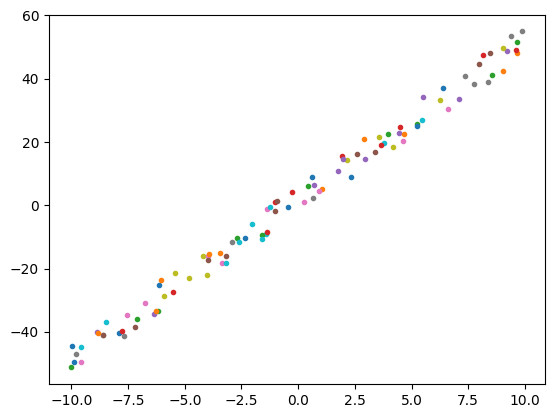

In [24]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子确保每次生成数据一致，下面的数值可修改
np.random.seed(20200325)

def generate_random_examples(n=100, noise=5):

    w = np.random.randint(5, 10)
    b = np.random.randint(-10, 10)
    print("The real w: {}, b: {}".format(w, b))
    
    # 初始化 data 和 label
    data = np.zeros((n,))
    label = np.zeros((n,))
    
    # 生成 n 个随机样本数据，并添加一定的噪声干扰
    for i in range(n):
        data[i] = np.random.uniform(-10, 10)
        label[i] = w * data[i] + b + np.random.uniform(-noise, noise)
        plt.scatter(data[i], label[i], marker=".")  # 将样本点绘制在坐标图上
    
    # 展示样本数据的分布
    plt.plot()
    plt.show()
    return data, label

original_data, original_label = generate_random_examples()

通过可视化观察样本的分布规律，不难发现，我们可以:

1. 尝试拟合 $y = w * x + b$ 这样一个线性模型（ $w$ 和 $b$ 均为标量）；
2. 选择使用均方误差损失作为优化目标；
3. 通过梯度下降法来更新参数 $w$ 和 $b$.

### Numpy 实现

对于这种非常简单的模型，完全可以使用 Numpy 进行算法实现，我们借此了解一下整个模型训练的流程：

epoch = 0, w = 3.509, b = 0.013, loss = 891.615


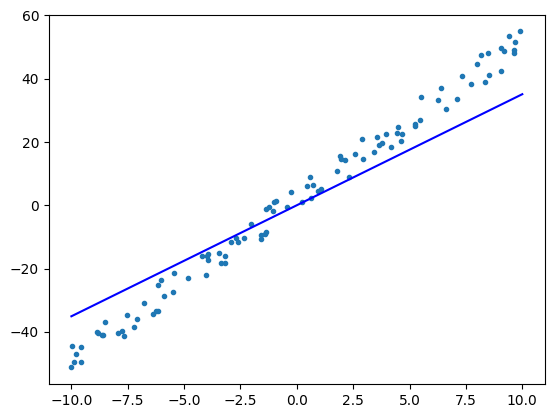

epoch = 1, w = 4.563, b = 0.041, loss = 91.146


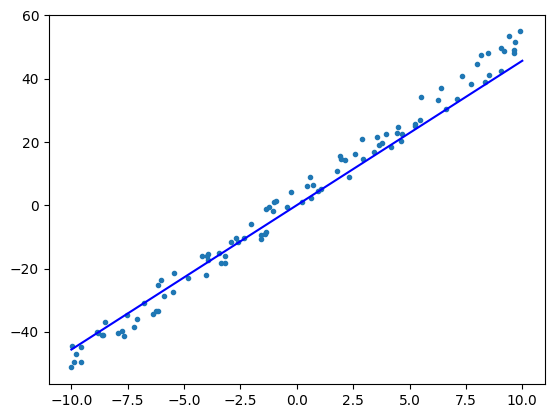

epoch = 2, w = 4.879, b = 0.073, loss = 18.842


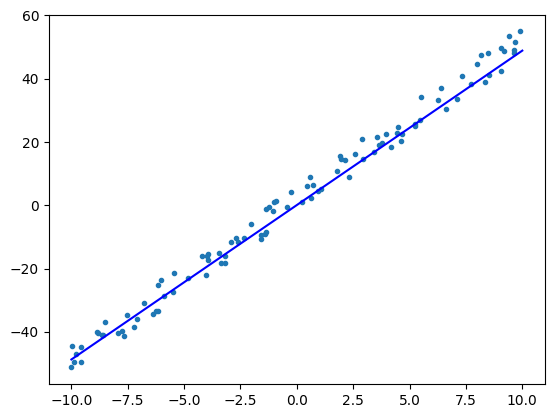

epoch = 3, w = 4.975, b = 0.105, loss = 12.219


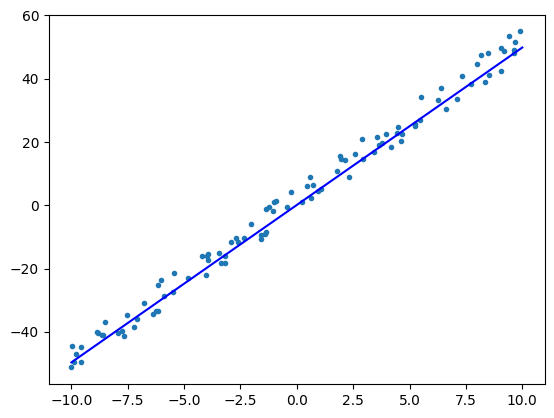

epoch = 4, w = 5.003, b = 0.137, loss = 11.524


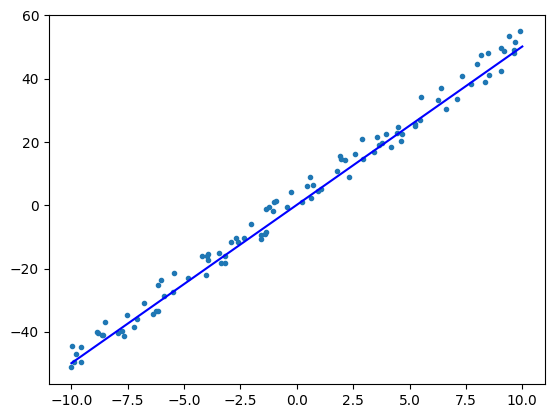

In [25]:
# 设置超参数
epochs = 5
lr = 0.01

# 获取数据
data = original_data
label = original_label
n = len(data)

# 参数初始化
w = 0
b = 0

# 定义模型
def f(x):
    return w * x + b

# 模型训练
for epoch in range(epochs):
    
    # 初始化单个 epoch 训练得到的损失
    loss = 0
    
    # 梯度初始化，等同于 Optimizer 中的 clear_grad()
    sum_grad_w = 0
    sum_grad_b = 0
    
    # 下面的 for 循环逻辑是，在单个 epoch 中遍历每个样本，分别计算预测值，损失值和梯度
    # 注意：为了方便理解，这里没有使用 NumPy 的“向量化实现”，而是使用了 for 循环写法
    for i in range(n):
        
        # 前向传播，主要计算预测值 pred 以及损失值 loss
        pred = f(data[i])                 # 通常 pred 为将 data 代入 “模型” 得到的输出，即 model(data)
        loss += (pred - label[i]) ** 2    # 等同于对每个样本使用 F.loss(pred, label) 计算后求和
        
        # 反向传播，根据均方误差损失计算参数的梯度，这里不解释推导过程，等同于 gm.backward()
        sum_grad_w += 2 * (pred - label[i]) * data[i]
        sum_grad_b += 2 * (pred - label[i])
    
    # 计算平均损失，因为对于不同的输入，求得的损失都会不同，所以通常累加求和后取平均
    loss = loss / n
    
    # 计算平均梯度，因为对于不同的输入，求得的梯度都会不同，所以通常累加求和后取平均
    grad_w = sum_grad_w / n
    grad_b = sum_grad_b / n
    
    # 更新参数，等同于 Optimizer 中的 step()
    w = w - lr * grad_w
    b = b - lr * grad_b
    
    # 查看参数和损失
    print("epoch = {}, w = {:.3f}, b = {:.3f}, loss = {:.3f}".format(epoch, w, b, loss))
    
    # 绘图查看拟合情况
    x = np.array([-10, 10])
    y = w * x + b
    plt.scatter(data, label, marker=".")
    plt.plot(x, y, "-b")
    plt.show()

可以看到，在 5 个 `epoch` 的迭代训练中，已经得到了一个拟合状况不错的线性模型，它慢慢地“回归”到我们预期的位置。

### MegEngine 实现

上面的流程，完全可以使用 MegEngine 来实现（你可以参照上面的 NumPy 代码，先尝试自己实现）：

In [26]:
import megengine.functional as F
from megengine import Tensor, Parameter
from megengine.autodiff import GradManager
import megengine.optimizer as optim

# 设置超参数
epochs = 5
lr = 0.01

# 获取数据
data = Tensor(original_data)
label = Tensor(original_label)

# 初始化参数
w = Parameter([0.0])
b = Parameter([0.0])

# 定义模型
def f(x):
    return F.mul(w, x) + b

# 定义求导器和优化器
gm = GradManager().attach([w, b])
optimizer = optim.SGD([w, b], lr=lr)

# 模型训练
for epoch in range(epochs):
    with gm:
        pred = f(data)
        loss = F.loss.square_loss(pred, label)
        gm.backward(loss)
        optimizer.step().clear_grad()
    
    print("epoch = {}, w = {:.3f}, b = {:.3f}, loss = {:.3f}"
          .format(epoch, w.item(), b.item(), loss.item()))

epoch = 0, w = 3.509, b = 0.013, loss = 891.615
epoch = 1, w = 4.563, b = 0.041, loss = 91.146
epoch = 2, w = 4.879, b = 0.073, loss = 18.842
epoch = 3, w = 4.975, b = 0.105, loss = 12.219
epoch = 4, w = 5.003, b = 0.137, loss = 11.524


你应该会得到相同的 `w`, `b` 以及 `loss` 值，下面直线的拟合程度也应该和 Numpy 实现一致：

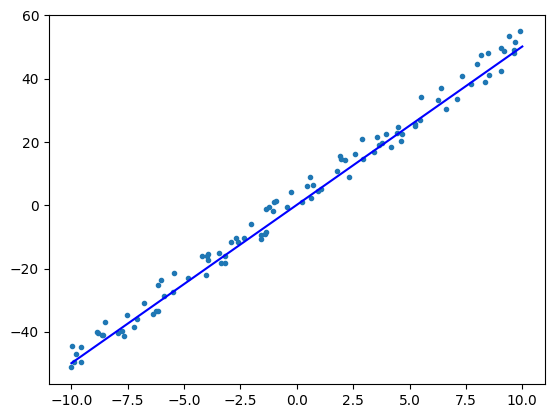

In [27]:
# 绘图查看拟合情况
x = np.array([-10, 10])
y = w.numpy() * x + b.numpy()
plt.scatter(data, label, marker=".")
plt.plot(x, y, "-b")
plt.show()

## 总结回顾

祝贺你完成了入门教程的学习，现在是时候休息一下，做一个简单的回顾了：

到目前为止，我们已经掌握了 MegEngine 框架中的以下概念：

- 计算图（Computing Graph）：MegEngine 是基于计算图的框架，计算图中存在数据节点、计算节点和边
  - 前向传播：输入的数据在计算图中经过计算得到预测值，接着我们使用损失 `loss` 表示预测值和实际值的差异
  - 反向传播：根据链式法则，得到计算图中所有参数关于 loss 的梯度，实现在 `autodiff` 子包，由 `GradManager` 进行管理
  - 参数更新：根据梯度下降算法，更新图中参数，从而达到优化最终 loss 的效果，实现在 `optimzer` 子包
- 张量（Tensor）：MegEngine 中的基础数据结构，用来表示计算图中的数据节点，可以灵活地与 Numpy 数据结构转化
- 参数（Parameter）：用于和张量做概念上的区分，模型优化的过程实际上就是优化器对参数进行了更新
- 超参数（Hype-parameter）：其值无法由模型直接经过训练学得，需要人为（或通过其它方法）设定
- 算子（Operator）：基于 Tensor 的各种计算的实现（包括损失函数），实现在 `functional` 子包

我们通过拟合 $f(x) = w * x + b$ 完成了一个最简单的线性回归模型的训练，干得漂亮！

## 问题思考

我们的 MegEngine 打怪升级之旅还没有结束，在前往下一关之前，尝试思考一些问题吧。

关于向量化实现：

- 当你发现 Python 代码运行较慢时，通常可以将数据处理移入 NumPy 并采用向量化（Vectorization）写法，实现最高速度的处理
- 线性模型训练的 NumPy 写法中，单个 `epoch` 训练内出现了 `for` 循环，实际上可以采取向量化的实现，我们在下个教程中会进行演示
- 使用向量化的实现，通常计算的效率会更高，因此建议：代码中能够用向量化代替 `for` 循环的地方，就尽可能地使用向量化实现

关于设备：

- 为什么一个 Tensor 需要具有 `device` 属性？都说 GPU 训练神经网络模型速度会比 CPU 训练快非常多，为什么？
- 我们可以把 Tensor 指定计算设备为 GPU 或 CPU，而原生 NumPy 只支持 CPU 计算，`Tensor.numpy()` 的过程是什么样的？
- 训练的速度是否会受到训练设备数量的影响呢？可不可以多个设备一起进行训练？

关于参数与超参数：

- 现在我们接触到了两个超参数 `epochs` 和 `lr`, 调整它们的值是否会对模型的训练产生影响？（不妨自己动手调整试试）
- 更新参数所用的梯度 `grad_w`，是所有样本的梯度之和 `sum_grad_w` 求均值，为什么不在每个样本反向传播后立即更新参数 `w`？
- 我们看上去得到了一条拟合得很不错的曲线，但是得到的 `b` 距离真实的 `b` 还比较远，为什么？如何解决这种情况？
- 如何选取合适的超参数，一定要初始化为 0 吗，对于超参数的选取是否有一定的规律或者经验可寻？

机器学习术语：

- 你可能会看到这样的说法，定义单个样本上的误差是损失函数，而定义在整个样本集上的误差是代价函数（Cost function）;
- 而在凸优化问题中，我们经常提到目标函数（Objective function）这一概念...
- 机器学习领域的术语定义通常比较混乱，为了避免造成认知上的负担，我们大部分时候统一用损失函数进行模糊的指代。
- 不用过于学究，我们真正的目的是理解和掌握，死记硬背或许能通过简单的面试流程，但终究不是一个好习惯。

关于数据集：

- 我们在线性模型中使用的是从 NumPy 代码生成的随机数据，修改数据集的样本数量 `n` 和噪声扰动程度 `noise` 会有什么影响？
- 对于现实中的数据集（文本、图像、音频、视频），如何转换成 MegEngine Tensor 的形式进行使用？
- 这中间需要经过什么样的预处理（Preprocessing）过程，有哪些流程是可以交由框架来完成的？
- 我们通过可视化观察得出了模型拟合效果不错的结论，更标准更科学的评估模型预测性能的做法是什么？

关于模型：

- 我们学会了定义了非常简单的线性回归模型，更复杂的模型要如何去写？如何科学地度量模型的结构风险？
- 既然任何神经网络模型本质上都可以用计算图来表示，那么神经网络模型的搭建流程是什么样的？

关于最佳实践：

- 在编写代码时，经常会有根据前人经验总结出的最佳实践（Best Practice）作为参考，例如：
  - 参数的更新和梯度的清空可以写在一起 `optimizer.step().clear_grad()`
  - 在导入某些包的时候，通常有约定俗成的缩写如 `import megengine.functional as F`
- 除此以外，还有什么样的编程习惯和最佳实践值得参考？如何将一份玩具代码整理变成模块化的工程代码？

这个系列教程将引导你慢慢地去思考这些问题，为了保证整体思路的连贯性，有的问题可能在系列的结束才给出答案。

深度学习，简单开发。我们鼓励你在实践中不断思考，并启发自己去探索直觉性或理论性的解释。

如果对教程内容有任何的建议和意见，欢迎在 MegEngine 论坛的 [官方教程](https://discuss.megengine.org.cn/tag/%E5%AE%98%E6%96%B9%E6%95%99%E7%A8%8B) 主题下发帖或留言～